<a href="https://colab.research.google.com/github/Derrick-Majani/Finance_Risk_Analytics/blob/main/Company_Default_Solution_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Company Default Data

### Description:
The dataset contains information on default payments & company details of Companies in India as on March 2019.

### Usage
Default

### Format
A data frame with 1384 observations on the following 11 variables

***Num***: ID of each company

***Net worth***: Value of the company (Value a corporation owns, minus the liabilities they owe)

***Default***: Default payment in next month (1=yes, 0=no)

***Total_assets***: Total amount of assets owned by the company

***Total_income***: Total income a business receives before any taxes, expenses, adjustments, exemptions, or deductions are taken out

***PAT_as_%_of_total_income***: Profit per sales dollar after all expenses are deducted from sales

***PBDITA_as_%_of_total_income***: Profit before depreciation, income tax and amortization divided by Total income

***PBT_as_%_of_total_income***: Profit per sales dollar before all expenses are deducted from sales

***Cash_profit_as_%_of_total_income***: Profit recorded by a business that uses the cash basis of accounting (Cash Profit:Total Cash profit)

***Current_ratio***: Liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year (Current assets divided by current liabilities)

***Debt_to_equity_ratio***: Leverage ratio that calculates the weight of total debt and financial liabilities against total shareholders’ equity


### Source:
Simulated data

#### Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving CompanyDefault.csv to CompanyDefault.csv


In [3]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
#data = pd.read_csv("German_Credit (1).csv")
Default =pd.read_csv(io.BytesIO(uploaded['CompanyDefault.csv']))
Default.sample(n=5)

,Num,Net_worth,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
810,1491,88.4,0,154.0,981.7,1.415911,3.412448,1.915045,2.332688,1.71,1.08
1228,1909,147.2,0,308.1,404.1,4.281119,13.412522,6.557783,8.883940,1.86,0.63
264,265,2.9,1,23.6,5.0,10.000000,22.000000,10.000000,22.000000,1.18,3.16
538,539,14.0,0,332.5,13.4,0.000000,2.985075,0.000000,-27.611940,1.01,15.76
347,348,6.0,0,9.5,7.8,-1.282051,5.128205,-1.282051,3.846154,4.14,0.35


In [4]:
#Default = pd.read_csv('CompanyDefault.csv')

#Glimpse of Data
Default.head()

,Num,Net_worth,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
0,1,-36.2,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,-35.7,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,-35.7,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,-35.5,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,-35.0,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


#### Fixing messy column names (containing spaces) for ease of use

In [5]:
Default.columns = Default.columns.str.replace('as_%_of', 'to')

In [7]:
Default.head()

,Num,Net_worth,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,-36.2,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,-35.7,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,-35.7,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,-35.5,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,-35.0,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [8]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 1384 
The number of columns (variables) is 11


#### Data types of all variables

In [9]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Num                          1384 non-null   int64  
 1   Net_worth                    1384 non-null   float64
 2   default                      1384 non-null   int64  
 3   Total_assets                 1384 non-null   float64
 4   Total_income                 1384 non-null   float64
 5   PAT_to_total_income          1384 non-null   float64
 6   PBDITA_to_total_income       1384 non-null   float64
 7   PBT_to_total_income          1384 non-null   float64
 8   Cash_profit_to_total_income  1384 non-null   float64
 9   Current_ratio                1384 non-null   float64
 10  Debt_to_equity_ratio         1384 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 119.1 KB


In [10]:
Default.duplicated().sum()

0

In [11]:
Default.drop('Num', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [13]:
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Net_worth,1384.0,122.504697,1299.293190,-36.2,6.000000,22.950000,116.500000,48117.0000
default,1384.0,0.234104,0.423591,0.0,0.000000,0.000000,0.000000,1.0000
Total_assets,1384.0,256.762568,404.127921,0.5,25.800000,103.450000,296.825000,2275.9710
Total_income,1384.0,381.657131,583.461117,0.1,31.225000,187.550000,428.142581,3449.8260
PAT_to_total_income,1384.0,-29.922088,346.245121,-9700.0,0.000000,1.464327,4.075183,150.0000
PBDITA_to_total_income,1384.0,-4.380180,218.854784,-6400.0,3.501816,8.569963,13.438735,100.0000
PBT_to_total_income,1384.0,-27.554086,332.137949,-9700.0,0.000000,2.148565,5.345512,100.0000
Cash_profit_to_total_income,1384.0,-16.239313,245.587280,-6400.0,1.045456,4.638115,8.024023,100.0000
Current_ratio,1384.0,1.771303,2.323773,0.0,0.880000,1.230000,1.942500,18.7900
Debt_to_equity_ratio,1384.0,3.394933,11.364884,0.0,0.187500,0.860000,1.970000,90.9441


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [14]:
Default["default"].value_counts()

0    1060
1     324
Name: default, dtype: int64

#### Checking proportion of default

In [ ]:
Default.default.sum() / len(Default.default)

0.23410404624277456

#### Check for missing values

In [15]:
Default.isnull().sum()

Net_worth                      0
default                        0
Total_assets                   0
Total_income                   0
PAT_to_total_income            0
PBDITA_to_total_income         0
PBT_to_total_income            0
Cash_profit_to_total_income    0
Current_ratio                  0
Debt_to_equity_ratio           0
dtype: int64

There are no missing values in the dataset.

#### Getting Top 5 rows

In [16]:
Default.head()

,Net_worth,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,-36.2,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,-35.7,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,-35.7,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,-35.5,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,-35.0,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


### Correlation heatmap

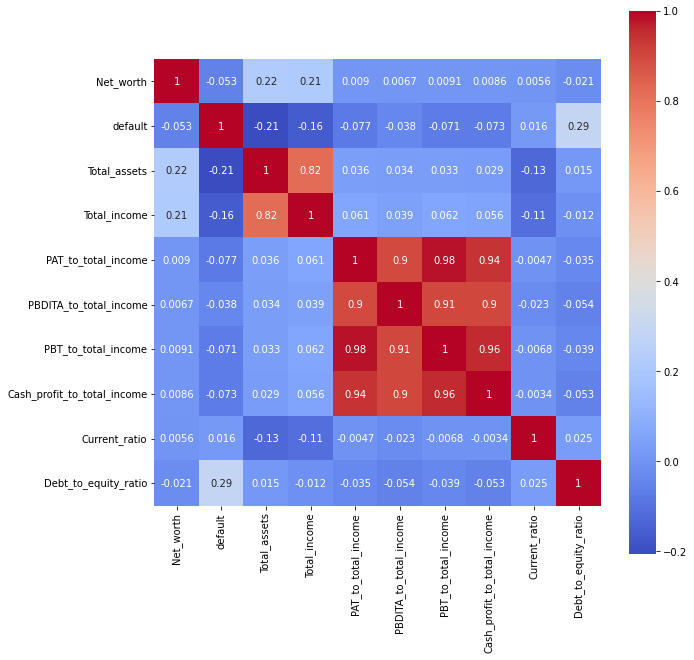

In [17]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(10,10))  # setting the size of figure to 12 by 10
p=sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

- Vaiables such as PAT_as_perc_of_total_income, PBDITA_as_perc_of_total_income, PBT_as_perc_of_total_income, Cash_profit_as_perc_of_total_income  are highly correlated among themselves
- Total income & Total assets seem to be highly correlated with each other

In [18]:
Default.corr()['default']

Net_worth                     -0.053352
default                        1.000000
Total_assets                  -0.206269
Total_income                  -0.159594
PAT_to_total_income           -0.077227
PBDITA_to_total_income        -0.038376
PBT_to_total_income           -0.071386
Cash_profit_to_total_income   -0.073467
Current_ratio                  0.015852
Debt_to_equity_ratio           0.288574
Name: default, dtype: float64

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

## Feature Selection

The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

For example, when faced with two models with the same or nearly the same score, but with the latter model using more variables, your immediate instinct should be to choose the one with fewer variables. That model is simpler to train, simpler to understand, easier to run, and less time consuming. 

Lets start with feature selection using manual backward selection method:

#### Checking the Net_worth column with respect to default

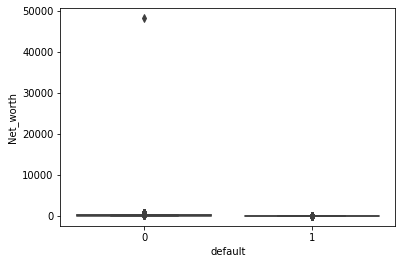

In [19]:
sns.boxplot(Default['default'], Default['Net_worth']);

In [20]:
median = Default['Net_worth'].median()
Default['Net_worth'] = np.where(Default['Net_worth'] > 40000, median, Default['Net_worth'])

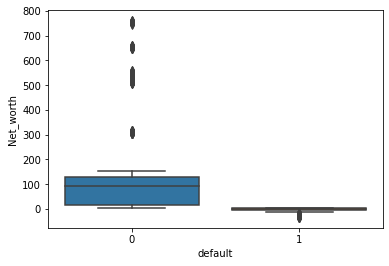

In [ ]:
sns.boxplot(Default['default'], Default['Net_worth']);

In [21]:
Default[['default', 'Net_worth']].groupby('default').describe()

Net_worth                                                            
            count        mean         std   min     25%   50%      75%    max
default                                                                      
0          1060.0  115.443538  156.997975   5.1  17.200  92.7  130.425  761.6
1           324.0   -2.832407    8.283433 -36.2  -4.025  -0.3    2.400    5.0

The min value of Net_worth in non-default cases is greater than the max value of Net_worth in case of default.

In [22]:
Default = Default.drop('Net_worth', axis = 1)

In [23]:
import statsmodels.formula.api as SM

## Model 1

Lets check all columns we have in the dataset

In [24]:
Default.columns

Index(['default', 'Total_assets', 'Total_income', 'PAT_to_total_income',
       'PBDITA_to_total_income', 'PBT_to_total_income',
       'Cash_profit_to_total_income', 'Current_ratio', 'Debt_to_equity_ratio'],
      dtype='object')

In [25]:
f_1 = 'default ~ Total_assets + Total_income + PAT_to_total_income + PBDITA_to_total_income + PBT_to_total_income + Cash_profit_to_total_income + Current_ratio + Debt_to_equity_ratio'

#### Fitting the logistic regression model on 'Default' dataset

In [26]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.449135
         Iterations 8


#### Checking the parameters

In [28]:
print(model_1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 1384
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.1747
Time:                        17:39:25   Log-Likelihood:                -621.60
converged:                       True   LL-Null:                       -753.16
Covariance Type:            nonrobust   LLR p-value:                 2.858e-52
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0027      0.115     -8.697      0.000      -1.229      -0.777
Total_assets                   -0.0051      0.001     -8.161      0.000      -0.

Most of the ratio variables are insignificant. 

#### Checking the Variance Inflation Factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
X = Default.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,PBT_to_total_income,41.006836
2,PAT_to_total_income,30.027017
5,Cash_profit_to_total_income,13.361123
3,PBDITA_to_total_income,6.237123
1,Total_income,4.244771
0,Total_assets,4.236531
6,Current_ratio,1.106762
7,Debt_to_equity_ratio,1.060792


In [31]:
X = X.drop('PBT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Cash_profit_to_total_income,10.205902
2,PAT_to_total_income,9.747080
3,PBDITA_to_total_income,6.219717
1,Total_income,4.241512
0,Total_assets,4.232691
5,Current_ratio,1.106063
6,Debt_to_equity_ratio,1.060614


In [32]:
X = X.drop('Cash_profit_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,PAT_to_total_income,5.266466
3,PBDITA_to_total_income,5.254615
1,Total_income,4.234343
0,Total_assets,4.224722
4,Current_ratio,1.105685
5,Debt_to_equity_ratio,1.058698


In [33]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,PAT_to_total_income,5.227906
2,PBDITA_to_total_income,5.222366
3,Current_ratio,1.105538
0,Total_income,1.085525
4,Debt_to_equity_ratio,1.052914


In [34]:
X = X.drop('PAT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Current_ratio,1.101867
0,Total_income,1.085145
3,Debt_to_equity_ratio,1.052913
1,PBDITA_to_total_income,1.005046


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = Default['default']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [38]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

## Model 2

In [39]:
model_2 = SM.logit(formula = 'default ~ Total_income + Current_ratio + Debt_to_equity_ratio + PBDITA_to_total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.493615
         Iterations 7


#### Checking the coefficients

In [40]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 0.09775
Time:                        17:41:01   Log-Likelihood:                -477.82
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 1.737e-21
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0539      0.131     -8.043      0.000      -1.311      -0.797
Total_income              -0.0011      0.000     -4.280      0.000      -0.002      -0.001
Curr

PBDITA_to_total_income is an insignificant variable, therefore, we will eliminate it.

## Model 3

In [41]:
model_3 = SM.logit(formula = 'default ~ Total_income + Current_ratio + Debt_to_equity_ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.493730
         Iterations 7


#### Checking the coefficients

In [42]:
print(model_3.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      964
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 0.09754
Time:                        17:41:30   Log-Likelihood:                -477.93
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 3.012e-22
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.0527      0.131     -8.040      0.000      -1.309      -0.796
Total_income            -0.0011      0.000     -4.299      0.000      -0.002      -0.001
Current_rati

Current_ratio is still insignificant, therefore, we will eliminate it

## Model 4

Adding variables pertaining to Repayment Status

In [43]:
model_4 = SM.logit(formula = 'default ~ Total_income + Debt_to_equity_ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.494279
         Iterations 7


In [44]:
print(model_4.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      965
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 0.09654
Time:                        17:41:50   Log-Likelihood:                -478.46
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 6.262e-23
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.1300      0.107    -10.592      0.000      -1.339      -0.921
Total_income            -0.0011      0.000     -4.241      0.000      -0.002      -0.001
Debt_to_equi

In [45]:
y_prob_pred_train = model_4.predict(Default_train)

In [46]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [47]:
from sklearn import metrics

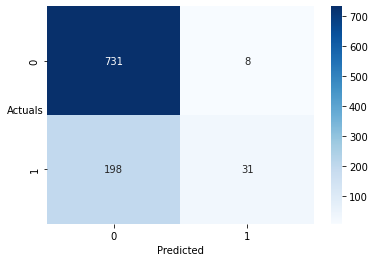

In [48]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Prediction on the Data

Now, let us see the predicted probability values.

In [62]:
y_prob_pred_4 = model_4.predict()

In [64]:
#sns.boxplot(x=Default['default'],y=y_prob_pred_4)
#plt.xlabel('Default');

#### Choosing the optimal threshold

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [54]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24395778809173133

#### Validating on the train set with revised threshold

In [55]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.24:
        a=1
    else:
        a=0
    y_class_pred.append(a)

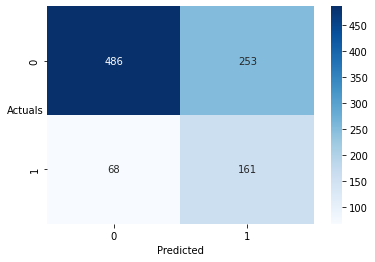

In [56]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [57]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.877     0.658     0.752       739
           1      0.389     0.703     0.501       229

    accuracy                          0.668       968
   macro avg      0.633     0.680     0.626       968
weighted avg      0.762     0.668     0.692       968



#### Validating on the test set

In [58]:
y_prob_pred_test = model_4.predict(Default_test)

In [59]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.24:
        a=1
    else:
        a=0
    y_class_pred.append(a)

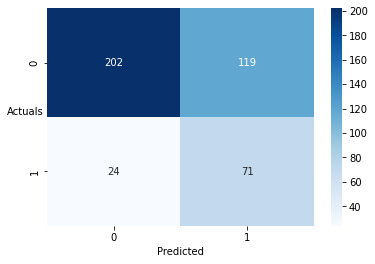

In [67]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [61]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.894     0.629     0.739       321
           1      0.374     0.747     0.498        95

    accuracy                          0.656       416
   macro avg      0.634     0.688     0.618       416
weighted avg      0.775     0.656     0.684       416



## END